# Schema del progetto

- Significato delle features
- Raccolta dati 
- Breve visualizzazione dei dati
- Pulizia dei dati
- Scelta del problema
- Risultato del test train
- Conclusioni


## Obbiettivo
L'obiettivo di questo progetto è quello di studiare il dataset e cercare di predire se un lavoratore, date certe informazioni, lascerà il lavoro o no.

## Significato delle features

Features:

- enrollee_id : Unique ID for candidate
- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

## Raccolta dati

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

In [3]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [6]:
df_test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [7]:
df_train.info()  # I do this to see what is the variables type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Si note la presenza di alcuni valori mancanti. Penso che ce ne siano così tanti nella features del genere perché forse l'HR che ha fatto l'intervista non ha pensato che fosse importante, molti esempi non hanno la caratteristica della disciplina principale compilata perché non potevano averne una e alla fine riguardo alle esperienze passate ci sono molti valori mancanti nella dimensione dell'azienda e nel company_type perché potrebbe essere che il nuovo impiegato non abbia nessuna esperienza lavorativa passata.


Variabili numeriche :
- city_ development_index 
- training_hours
- last_new_job
- experience

Varibili ordinabili:
- education_level
- company_size

Variabili nominali:
- enrollee_id
- gender
- relevent_experience
- enrolled_university
- major_discipline
- company_type

In [8]:
#Unisco train e test set

df_tot = pd.concat([df_train, df_test]).reset_index(drop = True)

In [9]:
columns= ['gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']
#Mostro unicità variabili
for col in columns:
    print(col, "\t",df_tot[col].unique(),"\n")

gender 	 ['Male' nan 'Female' 'Other'] 

relevent_experience 	 ['Has relevent experience' 'No relevent experience'] 

enrolled_university 	 ['no_enrollment' 'Full time course' nan 'Part time course'] 

education_level 	 ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School'] 

major_discipline 	 ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other'] 

experience 	 ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan] 

company_size 	 [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999'] 

company_type 	 [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO'] 

last_new_job 	 ['1' '>4' 'never' '4' '3' '2' nan] 



In [10]:
#Creo dizionari per le feature ordinabili
educational_level = { 'Primary School': 0,
                     'High School':1,
                     'Graduate':2,
                     'Masters':3,
                     'Phd':4
}
experience = {'<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
             }


company_size = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

#Sostituisco i nomi con i numeri nelle caratteristiche numeriche e ordinali
df_tot.loc[:,'last_new_job'] = df_tot['last_new_job'].map(last_new_job)
df_tot.loc[:,'company_size'] = df_tot['company_size'].map(company_size)
df_tot.loc[:,'experience'] = df_tot['experience'].map(experience)
df_tot.loc[:,'education_level'] = df_tot['education_level'].map(educational_level)


#Cancello la colonna "enrolle_id" e "city" perchè non sono utili
df_tot = df_tot.drop(columns = ['enrollee_id', 'city'] )

## EDA

Decido di mostrare le caratteristiche rispetto al fatto che i nuovi dipendenti lasciano il lavoro o no

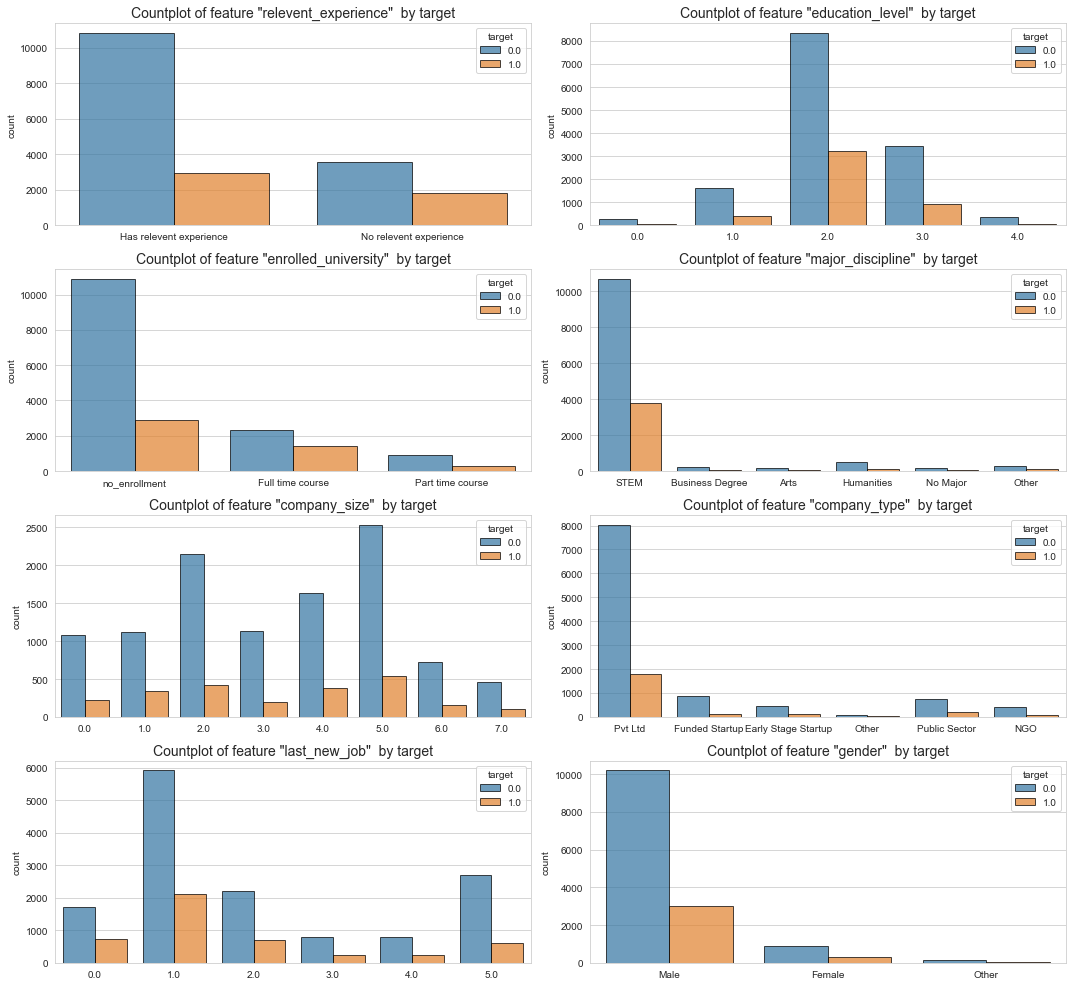

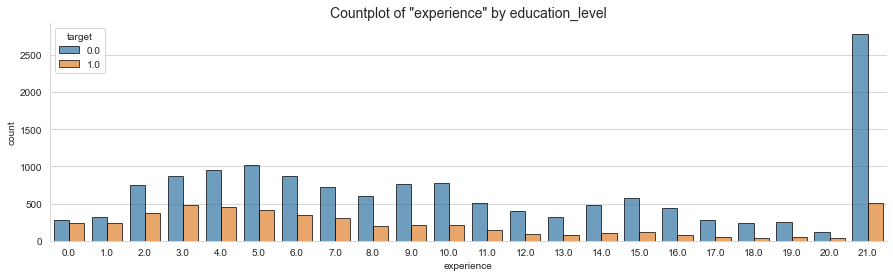

In [11]:
#barplot che mostra la frequenza di ogni categoria separata dall'etichetta
plt.figure(figsize=[15,17])
fft=["relevent_experience", "education_level", "enrolled_university","major_discipline","company_size","company_type", "last_new_job","gender"]
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_tot)
    plt.title("Countplot of feature \"{}\"  by target".format(f), size =14)
    plt.xlabel("")
    n=n+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='target',edgecolor="black", alpha=0.7, data=df_tot)
sns.despine()
plt.title("Countplot of \"experience\" by education_level", size = 14)
plt.show()

In [12]:
last_new_job_1=df_tot.loc[(df_tot['last_new_job']==1.0), 'target'].value_counts()
print("{:.2f}% of workers who didn't work for 1 years leaved new job " .format(100*last_new_job_1[1]/last_new_job_1.sum()))

last_new_job_2=df_tot.loc[(df_tot['last_new_job']==2.0), 'target'].value_counts()
print("{:.2f}% of workers who didn't work for 2 years leaved new job " .format(100*last_new_job_2[1]/last_new_job_2.sum()))

26.43% of workers who didn't work for 1 years leaved new job 
24.14% of workers who didn't work for 2 years leaved new job 


Alcune osservazioni
- Ci sono più persone che hanno qualche tipo di esperienza rispetto a quelle che non ce l'hanno. Questo secondo gruppo in proporzione sembra avere più lavoratori che lasciano il lavoro.


- Il più alto livello di istruzione è "graduate"('Scuola primaria': 0, 'Scuola superiore':1, 'Laureato':2, 'Master':3, 'Phd':4)


- Ho notato che per la caratteristica "experience" ci sono tre picchi rispettivamente in 5, 9, 11, ma il massimo è per 21 che corrisponde a maggiore di 20.


- In proporzione i lavoratori che hanno avuto un corso a tempo pieno all'università lasciano facilmente il lavoro rispetto a chi non si è iscritto alla scuola


- Il "stem" è l'università più comune tra i lavoratori 


- Non ci sono osservazioni particolari da fare per la feature "company size" ('<10':    0, '10/49':    1, '100-500': 2, '1000-4999':    3, '10000+':    4, '50-99':    5, '500-999':    6, '5000-9999': )


- Le persone di questo set di dati di solito lavorano in un'azienda privata


- I lavoratori di questo set di dati sono di solito uomini

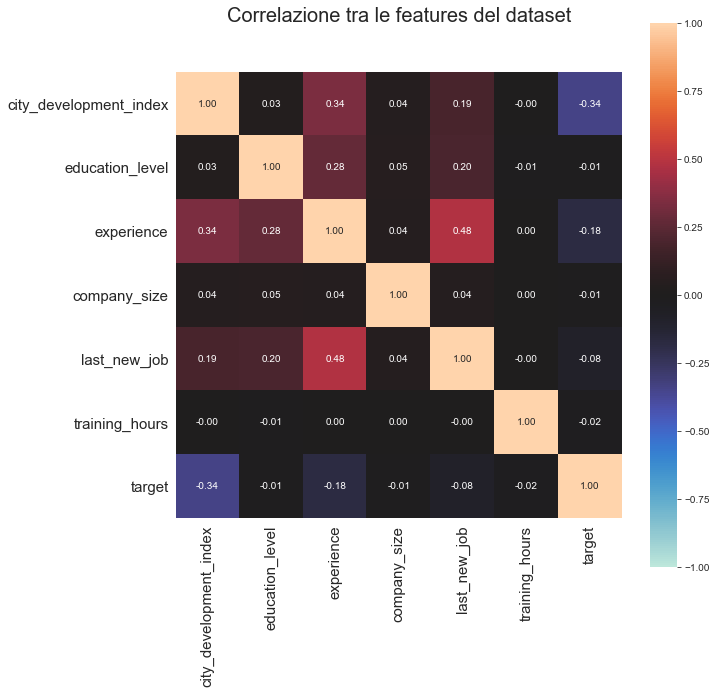

In [13]:
corr = df_tot[['city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']].corr()

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Correlazione tra le features del dataset",pad=50, size =20)
fig = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot= True,
    fmt=".2f"
)

yticks = [i for i in corr.index];
xticks = [i for i in corr.columns];
plt.yticks(plt.yticks()[0], labels=yticks,fontsize=15)
plt.xticks(plt.xticks()[0], labels=xticks,fontsize=15);      

Non ci sono evidenti correlazioni tra le features

## Pulizia dati

In [14]:
#Mostro qual è il tasso di valori mancanti per le caratteristiche.
print(df_tot.isna().sum()/df_tot.shape[0]*100 )

city_development_index     0.000000
gender                    23.563677
relevent_experience        0.000000
enrolled_university        1.958942
education_level            2.405224
major_discipline          14.680321
experience                 0.328839
company_size              30.816931
company_type              31.822239
last_new_job               2.175036
training_hours             0.000000
target                    10.001409
dtype: float64


In [15]:
#Mostro quanti sono i valori mancanti
df_tot.isna().sum()

city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [16]:
#Cancello gli esempi dove il target non è riportato
df_tot= df_tot.loc[df_tot['target'].isnull()==False]

In [17]:
# Mostro il tasso di valori mancanti
df_tot.isna().sum()/df_tot.shape[0]*100

city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [18]:
#MOstro i valori mancanti
df_tot.isna().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Poiché ci sono così tanti valori mancanti in "company_type" decido di riempire nan con "Unknown". Riempirò "gender", "major_discipline" e "company_size" con la risposta nei prossimi esempi perché mi aspetto di avere un riempimento di valori sconosciuti simile alla distribuzione del resto dei dati in queste categorie, riempirò i valori non conosciuti in "last_new_job" con 1 perché è la risposta più comune e lascerò perdere i nan in "education_level", "experience" e "enrolled_university" perché non ci sono così tanti valori.

In [19]:
df_tot= df_tot.dropna(how = 'any', subset = ["education_level","experience", "enrolled_university"])

In [20]:
df_tot[["company_type"]] = df_tot[["company_type"]].fillna(value = 'unknown')
df_tot[["major_discipline", "gender", "company_size"]] = df_tot[["major_discipline","gender", "company_size"]].fillna(method = 'ffill')
df_tot[["major_discipline","gender", "company_size"]] = df_tot[["major_discipline","gender", "company_size"]].fillna(method = 'bfill')
df_tot[['last_new_job']] = df_tot[['last_new_job']].fillna(value = 1.0)

In [21]:
#Mostro se ci sono ancora valori sconosciuti.
df_tot.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [22]:
#Dimensione dataset
df_tot.shape

(18360, 12)

In [23]:
#One hot encoding
df_tot = pd.get_dummies(df_tot, drop_first = True)
df_tot.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_unknown
0,0.920,2.0,21.0,5.0,1.0,36,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.776,2.0,15.0,5.0,5.0,47,0.0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.624,2.0,5.0,5.0,0.0,83,0.0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0.767,3.0,21.0,5.0,4.0,8,0.0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0.764,2.0,11.0,5.0,1.0,24,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## Scelta del problema

Il problema da risolvere rientra nell'ambito della classificazione. Il compito è quello di prevedere se un lavoratore lascerà il lavoro oppure no. True, lascerà il lavoro = 1, False, non lascerà il lavoro = 0. Sono interessato a prendere tutti quelli che lasceranno il lavoro, quindi devo concentrarmi sulla metrica di richiamo. Per me la cosa più importante è che tutte le persone che assumo non lascino il lavoro. Quindi sono interessato ad avere un basso indicatore di falso negativo.

Prima selezionerò i modelli in base al parametro di richiamo e poi mostrerò la curva di ROC

### Fase di addestramento e test del modello

Per ogni modello scelto otterrò il miglior modello per ogni tipo decidendo il migliore in base al punteggio di richiamo e poi lo testerò e mostrerò la curva ROC.

In [24]:
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

In [25]:
y = df_tot['target']
X = df_tot.drop(columns = 'target')

X_train, X_test, y_train, y_test = split(X, y, test_size = .2, random_state = 1)

In [26]:
# Scalo i dati per il KNN e il Linear SVC
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()

X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)

### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
param_grid = {'n_neighbors': np.arange(1,7,1).tolist(),
              'algorithm': ['ball_tree', 'kd_tree'],
              'leaf_size': np.power(2, np.linspace(0, 8, 10).tolist()).tolist()
             }  

knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions = param_grid, cv = 5, return_train_score = False, n_iter = 85, scoring = 'recall',random_state=1, n_jobs=-1)
knn.fit(X_train_scal, y_train)  
result=pd.DataFrame(knn.cv_results_)  
result[['param_n_neighbors','param_algorithm','param_leaf_size','mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:10]  # mostro la tabella con i primi 10 risultati

,param_n_neighbors,param_algorithm,param_leaf_size,mean_test_score,rank_test_score
1,1,ball_tree,256.0,0.429045,1
29,1,kd_tree,256.0,0.429045,1
42,1,ball_tree,40.317474,0.428769,3
31,1,ball_tree,74.657859,0.428769,3
59,1,kd_tree,74.657859,0.428769,3
25,1,kd_tree,40.317474,0.428769,3
23,1,kd_tree,138.247647,0.428769,3
76,1,ball_tree,21.77264,0.428769,3
67,1,ball_tree,11.757876,0.428769,3
8,1,ball_tree,138.247647,0.428769,3


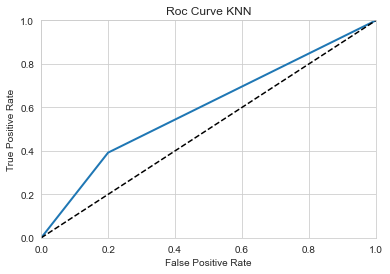

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve KNN')
    
prediction = cross_val_predict(knn, X_test_scal, y_test, cv=5, method="predict_proba")
predict_positive = prediction[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predict_positive)

plot_roc_curve(fpr, tpr)
plt.show()

### Linear SVC

In [30]:
from sklearn.svm import LinearSVC

In [31]:
param_grid = {'C':np.power(10, np.linspace(-2, 4, 20).tolist()).tolist()
             }  

svc_lin = GridSearchCV(LinearSVC(random_state=1), param_grid = param_grid, cv = 5, return_train_score = False, scoring = 'recall', n_jobs = -1)
svc_lin.fit(X_train, y_train)  
result=pd.DataFrame(svc_lin.cv_results_)  
result[['param_C', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:10]  

,param_C,mean_test_score,rank_test_score
10,14.384499,0.560137,1
5,0.379269,0.545196,2
11,29.763514,0.407178,3
8,3.359818,0.361752,4
4,0.183298,0.254984,5
13,127.427499,0.240070,6
12,61.584821,0.231543,7
3,0.088587,0.228854,8
2,0.042813,0.228832,9
7,1.623777,0.208742,10


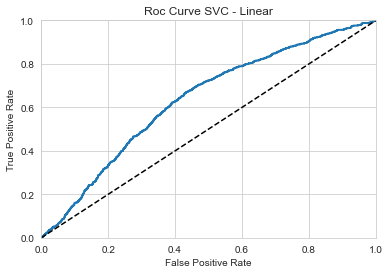

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve SVC - Linear')

prediction = cross_val_predict(svc_lin, X_test, y_test, cv=5,
method="decision_function")
fpr, tpr, thresholds = roc_curve(y_test, prediction)

plot_roc_curve(fpr, tpr)
plt.show()


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
param_grid = {'max_features': np.arange(12, 23, 1).tolist(),
              'min_samples_split': [float(x) for x in np.linspace(start=0.005, stop=0.05, num = 66)]
             }  


rfc = RandomizedSearchCV(RandomForestClassifier(random_state=1,n_estimators=100, n_jobs = -1), param_distributions = param_grid, cv = 5, return_train_score = False, n_iter = 448, scoring = 'recall', random_state=1, n_jobs = -1)
rfc.fit(X_train, y_train)  
result=pd.DataFrame(rfc.cv_results_)  
result[['param_max_features', 'param_min_samples_split', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:10] 

,param_max_features,param_min_samples_split,mean_test_score,rank_test_score
397,22,0.031308,0.595163,1
226,22,0.027846,0.594888,2
170,22,0.027154,0.594337,3
112,21,0.029231,0.593515,4
360,22,0.029923,0.593513,5
323,22,0.030615,0.593512,6
302,22,0.026462,0.592963,7
143,22,0.025769,0.592137,8
141,21,0.030615,0.591589,9
41,22,0.033385,0.589937,10


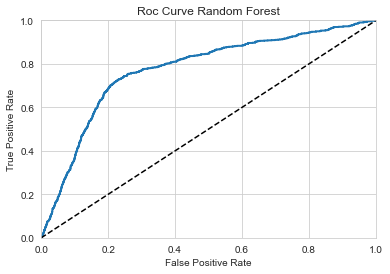

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve Random Forest')

prediction = cross_val_predict(rfc, X_test, y_test, cv=5, n_jobs=3, method="predict_proba")
predict_positive = prediction[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predict_positive)

plot_roc_curve(fpr, tpr)
plt.show()

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                'C' : np.power(10, np.linspace(-3, 5, 10).tolist()).tolist()}

lin_reg = GridSearchCV(estimator=LogisticRegression(random_state = 1, n_jobs = -1), param_grid=grid, n_jobs=-1, cv=5, scoring='recall',error_score=0)
lin_reg.fit(X_train, y_train)  
result=pd.DataFrame(lin_reg.cv_results_) 
result[['param_solver', 'param_C', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:10] 

,param_solver,param_C,mean_test_score,rank_test_score
29,liblinear,100000.0,0.241479,1
17,liblinear,27.825594,0.241479,1
23,liblinear,1668.100537,0.241204,3
20,liblinear,215.443469,0.241204,4
27,newton-cg,100000.0,0.240928,5
24,newton-cg,12915.49665,0.240928,5
21,newton-cg,1668.100537,0.240928,5
18,newton-cg,215.443469,0.240928,5
15,newton-cg,27.825594,0.240928,5
26,liblinear,12915.49665,0.240653,10


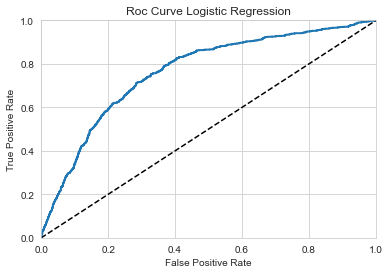

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve Logistic Regression')

prediction = cross_val_predict(lin_reg, X_test, y_test, cv=5, n_jobs=3, method="predict_proba")
predict_positive = prediction[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predict_positive)

plot_roc_curve(fpr, tpr)
plt.show()

### Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
param_grid = {'learning_rate': np.linspace(0.1,0.3,10).tolist(),
              'min_samples_split': [float(x) for x in np.linspace(start=0.001, stop=0.01, num = 60)],
              'max_depth':[2,3,4,5,6,7]
             }  


gbc = RandomizedSearchCV(GradientBoostingClassifier(random_state=1,n_estimators=100), param_distributions = param_grid, cv = 5, return_train_score = False, n_iter = 1680, scoring = 'recall', random_state=1, n_jobs = -1)
gbc.fit(X_train, y_train)  
result=pd.DataFrame(gbc.cv_results_)  
result[['param_learning_rate', 'param_min_samples_split', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:10] 

,param_learning_rate,param_min_samples_split,mean_test_score,rank_test_score
1168,0.1,0.008169,0.527779,1
1632,0.1,0.004051,0.526950,2
794,0.1,0.008932,0.526679,3
1389,0.1,0.008322,0.525853,4
1215,0.1,0.007559,0.525580,5
209,0.1,0.009695,0.525302,6
570,0.1,0.008475,0.524757,7
993,0.1,0.002525,0.524477,8
763,0.1,0.008169,0.523926,9
0,0.1,0.007102,0.523378,10


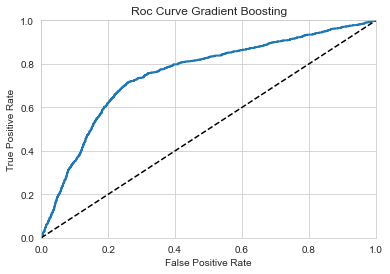

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve Gradient Boosting')

prediction = cross_val_predict(gbc, X_test, y_test, cv=5, n_jobs=3, method="predict_proba")
predict_positive = prediction[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predict_positive)

plot_roc_curve(fpr, tpr)
plt.show()

## Conclusioni
Mostro per ogni modello il recall, l'accuracy e l'AUC score e poi deciderò quale modello sarà il migliore

In [42]:
prediction_knn = knn.predict(X_test_scal)

prediction_svc_lin = svc_lin.predict(X_test)

prediction_rfc = rfc.predict(X_test)

prediction_lin_reg = lin_reg.predict( X_test)

prediction_gbc = gbc.predict(X_test)

In [43]:
#Punteggi per ogni modello.

KNN_pre, SVC_pre, RF_pre , Log_pre ,GB_pre = precision_score(prediction_knn, y_test), precision_score(prediction_svc_lin, y_test), precision_score(prediction_rfc, y_test), precision_score(prediction_lin_reg, y_test), precision_score(prediction_gbc, y_test)

KNN_rec, SVC_rec, RF_rec , Log_rec ,GB_rec = recall_score(prediction_knn, y_test), recall_score(prediction_svc_lin, y_test), recall_score(prediction_rfc, y_test), recall_score(prediction_lin_reg, y_test), recall_score(prediction_gbc, y_test)

KNN_acc, SVC_acc, RF_acc , Log_acc ,GB_acc = accuracy_score(prediction_knn, y_test), accuracy_score(prediction_svc_lin, y_test), accuracy_score(prediction_rfc, y_test),accuracy_score(prediction_lin_reg, y_test),accuracy_score(prediction_gbc, y_test)

KNN_auc, SVC_auc, RF_auc , Log_auc ,GB_auc = roc_auc_score(prediction_knn, y_test), roc_auc_score(prediction_svc_lin, y_test), roc_auc_score(prediction_rfc, y_test), roc_auc_score(prediction_lin_reg, y_test), roc_auc_score(prediction_gbc, y_test)

In [44]:
data = {'Recall':[KNN_rec, SVC_rec, RF_rec , Log_rec ,GB_rec], 'Accuracy':[KNN_acc, SVC_acc, RF_acc , Log_acc ,GB_acc], 'Precision':[KNN_pre, SVC_pre, RF_pre , Log_pre ,GB_pre],'AUC':[KNN_auc, SVC_auc, RF_auc , Log_auc ,GB_auc]} 
  
# Creo dataset 
df = pd.DataFrame(data, index =['KNN', 'SVC-linear', 'Random Forest', 'Logistic Regression','Gradient Boosting']) 

df

,Recall,Accuracy,Precision,AUC
KNN,0.399378,0.698257,0.421225,0.602015
SVC-linear,0.577889,0.759532,0.125821,0.673914
Random Forest,0.564103,0.786492,0.625821,0.717717
Logistic Regression,0.558252,0.764161,0.251641,0.674218
Gradient Boosting,0.573513,0.786765,0.559081,0.714301


Da quest'ultima panoramica sembra che Gradient Boosting abbia il miglior punteggio recall, ma Random Forest ha il miglior punteggio di precisione.
Questi 2 modelli hanno lo stesso punteggio AUC. 
Dal mio punto di vista direi che i modelli sono ugualmente utili.